# Image Multithresholding
#### A Python 3 library to find thresholds in the gray levels' histogram of an image, which may be used in segmentation.

For more details, *Cf.* Reference: Andrea Rey and Claudio Delrieux. *Multithresholding techniques in SAR image classification*. Remote Sensing Applications: Society and Environment, 23:100540, 2021.

#### Citation 

To cite this package in publications use: 

```
@software{leon2022image,
    author       = {Joaquin Leon and Andrea Rey},    
    title        = {Image Multithresholding: A Python package},    
    year         = 2022,    
    publisher    = {PyPi},    
    version      = {latest},    
    url          = {https://github.com/image-multithresholding/Image-multithresholding}    
}
```

#### Installing the package
Run the cell bellow to install the `image-multithresholding` package in your system.

In [1]:
python3 -m pip install image-multithresholding

### Histogram of gray levels
For a grayscale image in the luminance range 1 (black) to $L$ (white), $H(i)$ denotes the number of pixels in the image with gray level $i \in [1, \dots,L]$. 
The normalized gray-level histogram is defined by
$$p_i=\frac{H(i)}{N},$$
where $N$ is the total number of pixels.

##### Importing the modules
It is necessary to import the following modules in order to run the examples presented in this tutorial.

In [2]:
# Run this cell to import the necessary packages to run the example.
#!python3 -m pip install matplotlib numpy
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
from image_multi_thresholding.base import load_image

##### Loading the image to analyze
Load the image of interest using the `base.load_image` function.
In what follows, the analysis is based on the reference image named **exImage**.

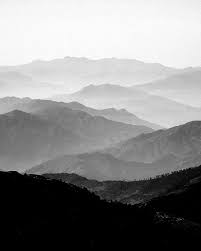

In [31]:
image = load_image('exImage.jpg')

# Preview
Image('exImage.jpg', width=200, height=200)

##### Colors for segmentation
Define colors to be used in the thresholded image obtained from **exImage**. Feel free to modify them.

In [32]:
COLORS = [
    (58, 3, 7),
    (93, 46, 70),
    (173, 106, 108),
    (208, 173, 167),
    (232, 214, 203),
]

##### Example of histogram
The code in the following cell produces and visualizes the histogram of the grays levels of the reference image. 

Text(0, 0.5, 'Pixel count')

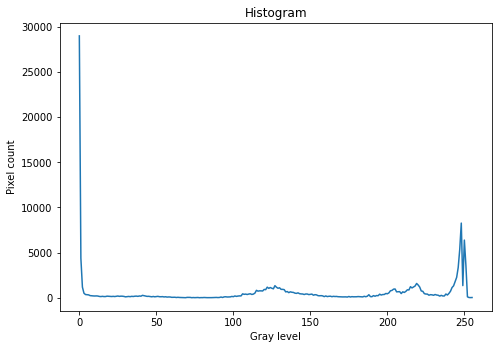

In [4]:
from image_multi_thresholding.base import _image_histogram

histogram = _image_histogram(image)

# Preview
%matplotlib inline
x = np.arange(0, len(histogram))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, histogram)
ax.set_title('Histogram')
ax.set_xlabel('Gray level')
ax.set_ylabel('Pixel count')

##### Example of probability density function (*pdf*)
The code in the following cell produces and visualizes the *pdf* of the grays levels of the reference image. 

Text(0, 0.5, '%')

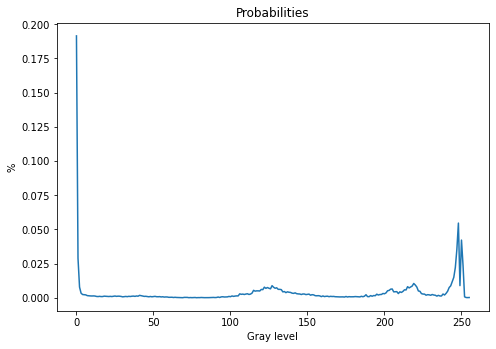

In [5]:
from image_multi_thresholding.base import _image_probabilities

prob = _image_probabilities(image)

# Preview
%matplotlib inline
x = np.arange(0, len(prob))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, prob)
ax.set_title('Probabilities')
ax.set_xlabel('Gray level')
ax.set_ylabel('%')

### Classes defined by a set of thresholds 
Given a set of gray levels $t_1, \dots ,t_{k-1}$ and considering $t_0=0$ and $t_k=L$, the collection $[1, \dots , L]$ can be partitioned into $k$ classes 
$$C_j=\{t_{j-1}+1, \dots ,t_j\},$$
for $j=1, \dots, k$.

### Basic statistical concepts
Consider the class $C_j$, for $j \in \{1, \dots, k\}$. 
The following is defined:
<ul>
<li> The probability of occurrence $$w_j=\sum_{i \in C_j} p_i.$$ </li>
<li> The mean of levels $$\mu_j=\sum_{i \in C_j} \frac{ip_i}{w_j}.$$ </li>
<li> The variance of levels $$\sigma_j^2=\sum_{i \in C_j} \frac{(i-\mu_j)^2p_i}{w_j}.$$ </li>
<li> The $n$th central moment of levels $$(\mu_n)_j=\sum_{i \in C_j} \frac{(i-\mu_j)^np_i}{w_j}.$$
Notice that $(\mu_2)_j=\sigma_j^2$. </li>
<li> The skewness of levels $(\beta_1)_j=\frac{(\mu_3)_j}{(\mu_2)_j^{3/2}}.$$ </li>
</ul>

### Otsu Method 

The between-class variance of gray levels is defined as:
$$ \sigma_B^2(s_1, \dots, s_{k-1})=\sum_{j=1}^k w_j (\mu_j-\mu_T)^2.$$

The optimal thresholds are those which maximize the between class variance:
$$(t_1,t_2, \dots, t_{k-1}) = \underset{1<s_1 < s_2 < \cdots <s_{k-1}<L}{\operatorname{argmax}} \{\sigma_B^2(s_1, s_2, \dots ,s_{k-1})\}.$$

**Reference:** Nobuyuki Otsu. *A threshold selection method from gray-level histograms*. IEEE Transactions on Systems, Man, and Cybernetics, 9(1):62–66, 1979.

In [6]:
from image_multi_thresholding.threshold.otsu import threshold_otsu

th_otsu = threshold_otsu(image, k=3)
th_otsu

(67, 168, 227)

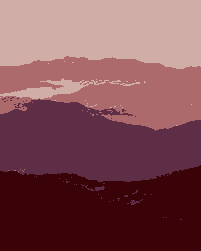

In [7]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_otsu, COLORS)

### Maximum Entropy Criterion 

The histogram total entropy of segmented classes is defined as:
$$TE(s_1, \dots , s_{k-1})=-\sum_{j=1}^k \sum_{i \in C_j} \frac{p_i}{w_j} \ln \left(\frac{p_i}{w_j}\right).$$

The optimal thresholds are those which maximize total entropy:
$$(t_1,t_2, \dots, t_{k-1}) = \underset{1<s_1 < s_2 < \cdots <s_{k-1}<L}{\operatorname{argmax}} \{TE(s_1, s_2, \dots ,s_{k-1})\}.$$


**Reference:** Jagat Narain Kapur, Prasanna K. Sahoo, and Andrew K. C. Wong. *A new method for gray-level picture thresholding using the entropy of the histogram*. Computer Vision, Graphics, and Image Processing, 29(3):273–285, 1985.

In [8]:
from image_multi_thresholding.threshold.mec import threshold_mec

th_mec = threshold_mec(image, k=3)
th_mec

(133, 158, 194)

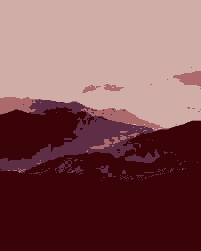

In [9]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_mec, COLORS)

### Hill Clustering Approach 

Image histogram can be divided in equal intervals of different gray levels, called cells. The sum of all frequencies of gray levels belonging to cell $i$ is represented by $f_i$. For two adjacent cells, arrow direction at cell $i$ is defined as follows:
$$d_i = \begin{cases}
1 & \text{if $f_{i-1}>f_{i+1} \wedge f_{i-1} \ge f_i \wedge f_i \ne 0$,} \\
-1 & \text{if $f_{i+1}>f_{i-1} \wedge f_{i+1} \ge f_i \wedge f_i \ne 0$,} \\
0 & \text{otherwise.}
\end{cases}$$

Peak identification holds in the following cases: 1.- cell $i$ is the peak of the hill if $d_i=0 \wedge d_{i-1}=-1 \wedge d_{i+1}=1$. 2.- there is a peak between cells $i$ and $i+1$ if $d_i=-1 \wedge d_{i+1}=1$. In order to find the optimum cell size, it must be initialized in zero and peak identification process must be repeated until desired number of peaks is reached. Afterwards, for $j=1, \dots , k-1$, the $j$th valley is located between cells $i_j$ and $h_j$ if $d_{i_j}=1 \wedge d_{h_j}=-1$, with $h_j$ the first value to the right of $i_j$ that verifies $d_{h_j}\ne 0$. Finally, if $a_{i_j}$ is the first gray level in cell $i_j$ and $b_{h_j}$ is the last gray level in cell $h_j$, the optimal thresholds are $t_j = a_{i_j} +(b_{h_j}-a_{i_j})/2$, for $j=1, \dots , k-1$. 

**Reference:** Du-Ming Tsai and Ying-Hsiung Chen. *A fast histogram-clustering approach for multi-level thresholding*. Pattern Recognition Letters, 13(4):245–252, 1992.


In [10]:
from image_multi_thresholding.threshold.hca import threshold_hca

th_hca = threshold_hca(image, k=3)
th_hca

[24, 80, 176, 232]

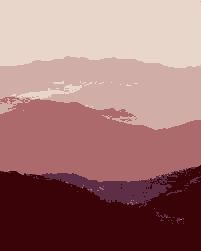

In [33]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_hca, COLORS)

### Maximum Likelihood Thresholding

The extension of maximum likelihood thresholding to multi-thresholding is equivalent to obtain the optimum thresholds:
$$ (t_1,t_2, \dots, t_{k-1}) = \underset{1<s_1 < s_2 < \cdots <s_{k-1}<L}{\operatorname{argmin}} \left\{\sum_{j=1}^k w_j \ln(\sigma_j^2)\right\}.$$


**Reference:** Takio Kurita, Nobuyuki Otsu, and N. Abdelmalek. *Maximum likelihood thresholding based on population mixture models*. Pattern Recognition, 25(10):1231–1240, 1992.


In [12]:
from image_multi_thresholding.threshold.mll import threshold_mll

th_mll = threshold_mll(image, k=3)
th_mll

(2, 247, 248)

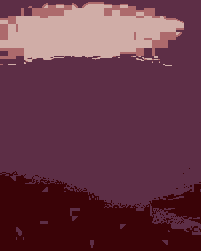

In [13]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_mll, COLORS)

### Linear Rational Approximation

The peaks $P_1, \dots, P_k$ are identified as explained in the method Hill Clustering Approach. Consider the sets of gray levels $X_1=\{x \in \text{cell}_i \text{ for some } i=P_1, \dots, P_2\}$, and $X_j=\{x \in \text{cell}_i \text{ for some } i=P_j+1$\}, for $j=2, \dots, k-1$. For each set, the algorithm can fit the points $(i,H(i))$ with $i \in X_j$ by a real rational function of the form $R(x)=\sum _{h=0}^n a_hx^h/(1+\sum_{h=1}^m b_hx^h)$. Then, for $j=1, \dots , k-1$, the optimal thresholds are as $t_j = \operatorname{argmin}_{i \in X_j} \{R(i)\}$.

**Reference:** Nikos Papamarkos and Basilios Gatos. *A new approach for multilevel threshold selection*. CVGIP: Graphical Model and Image Processing, 56(5):357–370, 1994.


In [14]:
from image_multi_thresholding.threshold.lra import threshold_lra

th_lra = threshold_lra(image, k=3, n=1, m=1)
th_lra

[120, 189, 247]

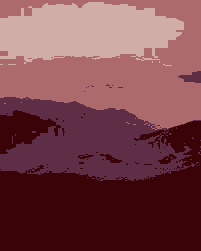

In [15]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_lra, COLORS)

### Maximum Correlation Criterion

Total correlation is defined by:
$$TC(s_1, \dots, s_{k-1})=-\sum_{j=1}^k \ln\left(\sum_{i \in C_j} \left(\frac{p_i}{w_j}\right)^2\right).$$

The optimal thresholds are those which maximize total correlation:
$$(t_1,t_2, \dots, t_{k-1}) = \underset{1<s_1 < s_2 < \cdots <s_{k-1}<L}{\operatorname{argmax}} \{TC(s_1, s_2, \dots ,s_{k-1})\}.$$


**Reference:** Jui-Cheng Yen, Fu-Juay Chang, and Shyang Chang. *A new criterion for automatic multilevel thresholding*. IEEE Transactions on Image Processing, 4(3):370–378, 1995.


In [16]:
from image_multi_thresholding.threshold.mcc import threshold_mcc

th_mcc = threshold_mcc(image, k=3)
th_mcc

(13, 106, 202)

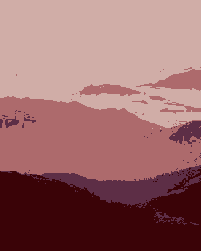

In [17]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_mcc, COLORS)

### Automatic Thresholding Criterion

First, $s_1$ is found using the method Maximum Correlation Criterion for two classes. This produces the classes $\{1, \dots, s_1\}$ and $\{s_1+1, \dots, L\}$. The same method is then applied to the normalized class with the highest variance, in order to obtain $s_2$ and partitioning the histogram in three classes. This is repeated until $s_{k-1}$ is computed. The optimal thresholds are obtained sorting the set $\{s_1, s_2, \dots, s_{k-1}\}$.


**Reference:** Nikos Papamarkos and Basilios Gatos. *A new approach for multilevel threshold selection*. CVGIP: Graphical Model and Image Processing, 56(5):357–370, 1994.

In [18]:
from image_multi_thresholding.threshold.atc import threshold_atc

th_atc = threshold_atc(image, k=3)
th_atc

[42, 148, 198]

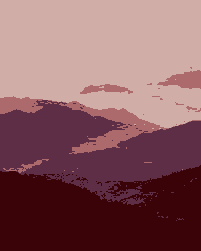

In [19]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_atc, COLORS)

### Fast Otsu Method

For $u,v \in \{1,2, \dots, L\}$, $u$-$v$ interval zeroth-order and first-order moments are respectively defined by: $P(u,v)=\sum_{i=u}^v p_i$, and $S(u,v)=\sum_{i=u}^v ip_i$.
Considering $s_0=0$ and $s_k=L$, the modified between-class variance per class is given by:
$$\widetilde{\sigma}^2_B (s_1,\dots,s_{k-1})= \sum_{j=0}^{k-1} H(s_j+1,s_{j+1}),$$
where $H(s_j+1,s_{j+1}) = [S(s_j+1,s_{j+1})]^2/P(s_j+1,s_{j+1})$. Thus, optimal thresholds are those which maximize modified between-class variance:
$$(t_1,t_2, \dots, t_{k-1}) = \underset{1<s_1 < s_2 < \cdots <s_{k-1}<L}{\operatorname{argmax}} \{\widetilde{\sigma}_B^2(s_1, s_2, \dots ,s_{k-1})\}.$$


**Reference:** Ping-Sung Liao, Tse-Sheng Chen, Pau-Choo Chung, et al. *A fast algorithm for multilevel thresholding*. J. Inf. Sci. Eng., 17(5):713–727, 2001.


In [29]:
from image_multi_thresholding.threshold.otsu import threshold_fom

th_fom = threshold_fom(image, k=3)
th_fom

(74, 168, 227)

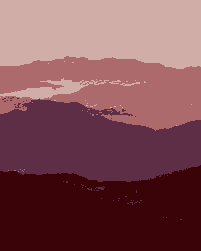

In [30]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_fom, COLORS)

### Deterministic Parameter Criterion

Given $p > 0$, consider a Gaussian mask with bins $b_n = 0.5[1-\cos(n\pi/p)]$, for $n=1, \dots ,2p+1$. Applying mask convolution to the original histogram $H(i)$,  
$$\tilde{H}(i)=\begin{cases}
\frac{1}{2p+1} \sum\limits_{h=1-i}^p b_{h+p+1}H(i+h) & \text{if $1 \le i \le p$,} \\
\frac{1}{2p+1} \sum\limits_{h=-p}^p b_{h+p+1}H(i+h) & \text{if $p+1 \le i \le L-p$,} \\
\frac{1}{2p+1} \sum\limits_{h=-p}^{L-i} b_{h+p+1}H(i+h) & \text{if $L-p+1 \le i \le L$.} \end{cases}
$$
Given $i \in \{2, \dots , L-1\}$, we say that $\tilde{H}(i)$ is a valley if $\tilde{H}(i)<\tilde{H}(i-1)$ and $\tilde{H}(i)<\tilde{H}(i+1)$, which is denoted by $V(i)$. Suppose there are $k-1$ valleys, then the smoothed histogram can be divided into the classes $C_j=\{V(j-1), \dots, V(j)-1\}$, for $j=1,\dots ,k$, where $V(0)=1$ and $V(k)=L+1$. For each class $C_j$, fix $l_j=\max\{z \in \mathbb{Z}/z \le 0.5[V(j)-V(j-1)-1]\}$. The searching windows of $C_j$ are defined by $W_j^h = \{V(j-1)+h, \dots , V(j-1)+h+l_j\}$, for $0 \le h \le l_j$. If $(\beta_1)_j^h$ is the skewness of the searching window $W_j^h$, the optimal window for the class $C_j$ is obtained as $W_j^{\text{opt}} = \operatorname{argmin}_{0 \le h \le l_j} \{|(\beta_1)_j^h|\}$. Given class $C_j$, the mean is estimated by $\widehat{m_j} = \sum_{i \in W_j^{\text{opt}}} i\tilde{H}(i)/\sum_{i \in W_j^{\text{opt}}} \tilde{H}(i)$, the variance by $\widehat{\sigma^2_j} = \sum_{i \in W_j^{\text{opt}}} (i-\widehat{m_j})^2 \tilde{H}(i)/\sum_{i \in W_j^{\text{opt}}} \tilde{H}(i)$, and the proportion by $\widehat{P_j} = \sum_{i \in W_j^{\text{opt}}}  \tilde{H}(i)/\sum_{i=1}^L \tilde{H}(i)$.

If $m = \underset{1 \le j \le k}{\operatorname{argmax}} \left\{\frac{\widehat{P_j}}{\sqrt{2\pi} \widehat{\sigma_j}} \exp \left[ -\frac{1}{2} \left( \frac{i-\widehat{m_j}}{\widehat{\sigma_j}} \right)^2\right]\right\}$, the classification label is $i \in C_m$ for $i=1, \dots, L$ and $m=1, \dots, k$. Thus, optimal thresholds are given by $t_j = \max \{i / i \in C_j\}$, for $j=1, \dots, k-1$.


**Reference:** Jeng-Horng Chang, Kuo-Chin Fan, and Yang-Lang Chang. *Multimodal gray-level histogram modeling and decomposition*. Image and Vision Computing, 20(3):203–216, 2002.



In [22]:
from image_multi_thresholding.threshold.dpc import threshold_dpc

th_dpc = threshold_dpc(image, mink=3)
th_dpc

[86]

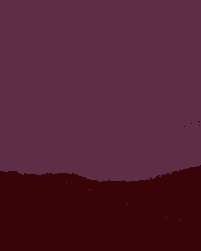

In [23]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_dpc, COLORS)

### Differential Evolution Optimization 

Fix the following parameters: number of population $N$,  mutation scale factor $F\in (0,1)$, crossover constant $C\in [0,1]$, and  number of iterations $M$. Generate $N$ random possible solutions $t_i=t_{i,1}, \dots ,t_{i,k-1}$ ($i=1, \dots , N$), and register the best one $t^{\text{best}}$. Repeat the following cycle $M$ times:
<ol>
<li>Apply mutation using two distinct random solutions $r_1\ne r_2$, $t_i^{\text{mutated}} = t^{\text{best}} + F (t_{r_1}-t_{r_2})$.</li>
<li>For a random uniform number $r$ and a random solution $j$, apply exponential crossover:
$$t_i^{\text{crossed}} = \begin{cases}
	t_i^{\text{mutated}} & \text{if $r\le C$ or $i=j$,}\\
	t_i & \text{otherwise.}
	\end{cases}$$</li>
<li>Find new fitness function values and update solutions if this value is improved. If necessary, the best solution must also be updated.</li>
</ol>
Thus, optimal thresholds are equal to the global best solution among the $N$ ones obtained after the iteration process.


**Reference:** Erik Cuevas, Daniel Zaldivar, and Marco Pérez-Cisneros. *A novel multi-threshold segmentation approach based on differential evolution optimization*. Expert Systems with Applications, 37(7):5265–5271, 2010.


In [24]:
from image_multi_thresholding.threshold.deo import threshold_deo

th_deo = threshold_deo(image, k=3)
th_deo

[67, 168, 227]

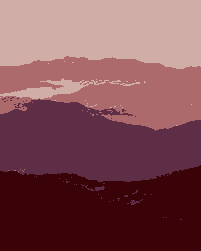

In [25]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_deo, COLORS)

### Genetic Algorithm Approach

Fix the following parameters: number of population $N$, $cr$ to represent the fraction of  crossover replacement, $mr$ to represent the  fraction of mutation replacement, and number of iterations $M$. Generate $N$ random possible chromosomes $t_i=t_{i,1}, \dots ,t_{i,k-1}$ ($i=1, \dots , N$). For crossover and mutation transformations, arguments must be converted to binary numbers and they will be denoted by $ch$. Repeat the following cycle $M$ times:
<ol>
	<li>While number of new population is less than $N$, do the following:
	<ol>
		<li>Use roulette wheel selection to choose two chromosomes $ch_1$ and $ch_2$, conserving the number of desired thresholds to add to new population.</li>
		<li>Apply crossover for a random number $r_1 \in [0,1]$	and a random position $h$, if $r_1 < cr$ then: 
		$$(ch_a^\text{new})_i = \begin{cases}
		(ch_a)_i & \text{if $i<h$,} \\
		(ch_{\sigma(a)})_i & \text{if $i \ge h$,} \\
		\end{cases}$$
        for $a=1,2$, $\sigma(1)=2$, and $\sigma(2)=1$.</li>
		<li>Apply mutation for a random number $ r_2 \in [0,1]$ and a random position $h$, if $r_2 < mr$ then:
		$$(ch_a^\text{new})_i = \begin{cases}
		(ch_a)_i & \text{if $i \ne h$}, \\
		\neg(ch_a)_h & \text{if $i=h$}, \\
		\end{cases}$$
		for $a=1,2$, $\neg 0=1$, and $\neg 1=0$.</li>
		<li>Update new population according to fitness function $f$ as follows:
		<ul>
			<li>If $f(ch_1^\text{new})> \max\{f(ch_1), f(ch_2)\}$, then $ch_1^\text{new}$ is added to new population.
			<li>If $f(ch_2^\text{new})> \max\{f(ch_1), f(ch_2)\}$, then $ch_2^\text{new}$ is added to new population.
        </ul></li>
        </ol></li>
</ol>

Optimal thresholds are equal to the best global chromosome converted to decimal number among the $N$ ones obtained after the iteration process.


**Reference:** Omar Banimelhem and Yahya Ahmed Yahya. *Multi-thresholding image segmentation using genetic algorithm*. In Proceedings of the International Conference on Image Processing, Computer Vision, and Pattern Recognition (IPCV), pages 1–1. The Steering Committee of The World Congress in Computer Science, Computer, 2011.

In [27]:
from image_multi_thresholding.threshold.gaa import threshold_gaa

th_gaa = threshold_gaa(image, k=3)
th_gaa

[62, 133, 159]

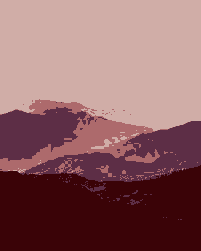

In [28]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_gaa, COLORS)

### Shuffled Frog Leaping Method

Fix the following parameters:  number of memeplex $m$,  number of frogs in each memeplex $n$, total of replication in memeplex evolution $E$, and number of iterations $M$. In this case, $N=mn$ is the total number of population. Generate $N$ random possible frogs $t_i=t_{i,1}, \dots ,t_{i,k-1}$ ($i=1, \dots , N$), and register both the best frog $t^\text{best}$ and the best fitness function value $f^{\text{best}}$. Repeat the following cycle $M$ times:
<ol>
	<li>For $h=1, \dots , m$, distribute frogs in memeplex $Mem_h = \{t_{(h-1)n+1}, \dots ,  t_{hn}\}$.</li>
	<li>Repeat the following internal evolution cycle $E$ times:
	<ol>
		<li>For each memeplex, find the best and the worst frogs $t_{Mem_h}^\text{best}$ and $t_{Mem_h}^\text{worst}$.
		<li>Consider random numbers $r_1,r_2 \in [0,1]$, and generate a new frog $t_{Mem_h}^\text{new} = t_{Mem_h}^\text{worst} + r_1 (t_{Mem_h}^\text{best}-t_{Mem_h}^\text{worst})$.
		<li>Update the worst frog:
		$$\begin{cases}
		& \text{if $f(t_{Mem_h}^\text{new})>f(t_{Mem_h}^\text{worst})$: }  t_{Mem_h}^\text{new worst}=t_{Mem_h}^\text{worst}, \\
		& \text{else if: }  t_{Mem_h}^\text{new} = t_{Mem_h}^\text{worst} + r_2 (t^\text{best}-t_{Mem_h}^\text{worst}), \\
		& \hskip 1.1cm \text{if $f(t_{Mem_h}^\text{new})>f(t_{Mem_h}^\text{worst})$:} \\
		& \hskip 1.1cm t_{Mem_h}^\text{new worst}=t_{Mem_h}^\text{worst}, \\
		& \hskip 1.1cm \text{else if:}  \\
		& \hskip 1.1cm t_{Mem_h}^\text{new worst} \text{ is a random generated frog.}
		\end{cases}$$
		</ol></li>
	<li>Joint all frogs and update the best frog $t^\text{best}$.</li>
</ol>

Optimal thresholds are equal to the best global frog among the $N$ ones obtained after the iteration process.


**Reference:** M. H. Horng. *Multilevel image threshold selection based on the shuffled frog-leaping algorithm*. Journal of Chemical and Pharmaceutical Research, 5(9):599–605, 2013.


In [34]:
from image_multi_thresholding.threshold.sfl import threshold_sfl

th_sfl = threshold_sfl(image, k=3)
th_sfl

[101, 162, 218]

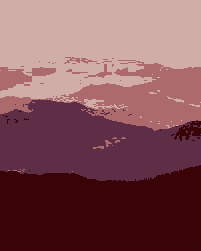

In [35]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_sfl, COLORS)

### Particle Swarm Optimization 

Fix the following parameters: number of population $N$, initial and final inertia $\omega^I$ and $\omega^F$, initial acceleration constants $c^I_1$ and $c^I_2$,  final acceleration constants $c^F_1$ and $c^F_2$, and number of iterations $M$.
Generate $N$ random possible particle positions $t_i=t_{i,1}, \dots ,t_{i,k-1}$ ($i=1, \dots , N$), and register the best global particle position $t^\text{best}$. Initialize particle velocities $v_i$ as null vector and the best particle positions $t_i^\text{best}=t_i$. For $h=1, \dots , M$ repeat the following cycle:
<ol>
	<li>Update inertia $\omega = (\omega^I-\omega^F)(M-h)/M+\omega^F$, and accelerations $c_a = c_a^h+(c_a^F-c_a^I)h/M$, for $a=1,2$.</li>
	<li>Update velocities for random numbers $ r_1,r_2 \in [0,1]$, $v_i^\text{new} = \omega v_i + c_1 r_1(t_i^\text{best}-t_i) + c_2 r_2(t^\text{best}-t_i)$.</li>
	<li>Update particle positions preserving range of solutions, $t_i^\text{new} = t_i + v_i^\text{new}$.</li>
	<li>Update the best particle positions $t_i^\text{new best} = t_i^\text{new}$, if $f(t_i^\text{new})>f(t_i^\text{best})$.</li>
	<li>If necessary, update the best global particle position $t^\text{best}$.</li>
</ol>

Optimal thresholds are equal to the best global particle position among the $N$ ones obtained after the iteration process.


**Reference:** Fayçal Hamdaoui, Anis Sakly, and Abdellatif Mtibaa. *An efficient multithresholding method for image segmentation based on PSO*. In International Conference on Control, Engineering & Information Technology (CEIT’14), pages 203–213, 2014.


In [36]:
from image_multi_thresholding.threshold.pso import threshold_pso

th_pso = threshold_pso(image, k=3)
th_pso

array([ 68, 168, 226])

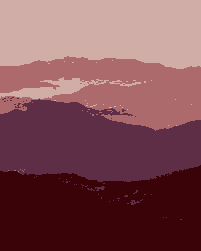

In [37]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_pso, COLORS)

### State Transition Algorithm

Fix the following parameters: search enforcement $N$,  maximum and minimum values for rotation factor $\alpha_{\max}>0$ and $\alpha_{\min}>0$ respectively, translation factor  $\beta>0$,  expansion factor $\gamma>0$,  axesion factor $\delta>0$, lessening coefficient $c>0$, and  number of iterations $M$. Generate $N$ random possible states $t_i=t_{i,1}, \dots ,t_{i,k-1}$ ($i=1, \dots , N$). Repeat the following cycle $M$ times:
<ol>
	<li>Generate a random number $\alpha \in [0,1]$ and, if $\alpha < \alpha_{\min}$, then use $\alpha=\alpha_{\max}$.</li>
	<li>Apply expansion transformation using a random diagonal matrix $E \in \mathbb{R}^{(k-1) \times (k-1)}$ with elements obeying the Gaussian distribution, $t_i^\text{expanded} = t_i + \gamma E t_i'$, where $x'$ denotes the transpose of $x$.</li>
	<li>Using fitness function $f$, and if $f(t_i^\text{expanded})>f(t_i)$, then do the following:
	<ol>
		<li>Update state $t_i^\text{new} = t_i^\text{expanded}$.</li>
		<li>Apply translation transformation for a random number $T \in [0,1]$, $t_i^\text{translated} = t_i^\text{new} + \beta T (t_i^\text{new}-t_i)/\lVert t_i^\text{new}-t_i \lVert_2$, where $\lVert v \lVert_2$ indicates the 2-norm of the vector $v$.</li>
		<li>If $f(t_i^\text{translated})>f(t_i^\text{new})$, update state $t_i^\text{final new} = t_i^\text{translated}$.</li>
	</ol></li>
	<li>Apply rotation transformation to the $t_i$ obtained after the modifications in the previous step, using a random matrix $R \in \mathbb{R}^{(k-1) \times (k-1)}$ with elements in $[-1,1]$, $t_i^\text{rotated} = t_i + \alpha R t_i'/[(k-1) \lVert t_i \lVert_2]$.</li>
	<li>Using fitness function $f$, and if $f(t_i^\text{rotated})>f(t_i)$, then update state $t_i^\text{new} = t_i^\text{rotated}$, and follow analogous steps to (b) and (c).</li>
	<li>Using a diagonal random matrix $A \in \mathbb{R}^{(k-1) \times (k-1)}$ with elements obeying the Gaussian distribution and only one random position having non-zero value, apply axesion transformation to the $t_i$ modified in the step above, $t_i^\text{axeded} = t_i + \delta A t_i'$.</li>
	<li>Using fitness function $f$, and if $f(t_i^\text{axeded})>f(t_i)$, update state $t_i^\text{new} = t_i^\text{axeded}$, and follow analogous steps to (b) and (c). </li>
	<li>Update rotation factor $\alpha^\text{new} = \alpha/c$.</li>
</ol>

Optimal thresholds are equal to the best global state among the $N$ ones obtained after the iteration process.


**Reference:** Jie Han, Chunhua Yang, Xiaojun Zhou, and Weihua Gui. *A new multi-threshold image segmentation approach using state transition algorithm*. Applied Mathematical Modelling, 44:588–601, 2017.


In [38]:
from image_multi_thresholding.threshold.sta import threshold_sta

th_sta = threshold_sta(image, k=3)
th_sta

array([ 84, 172, 230])

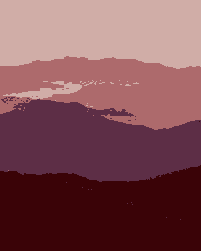

In [39]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_sta, COLORS)

### Histogram Sampling Technique

Let $A$ be the set of gray levels at which local minimum is reached using discrete gradient descent. If $r$ is a non-trivial divisor of $L$, histogram can be partitioned in $r$ regions of equal size. Let $B$ be the set of all minimum points in the histogram for each partition. Intersection $A\cap B$ can be grouped in subsets $(A\cap B)_j$ for $j=1, \dots , k-1$, with the same number of elements with possible exception for the last one. Optimal thresholds are $t_j = \textrm{mean} (A\cap B)_j$.


**Reference:** Amit Gurung and Sangyal Lama Tamang. *Image segmentation using multi-threshold technique by histogram sampling*. arXiv Preprint arXiv:1909.05084, 2019.

In [40]:
from image_multi_thresholding.threshold.hst import threshold_hst

th_hst = threshold_hst(image, k=2)
th_hst

[65, 181]

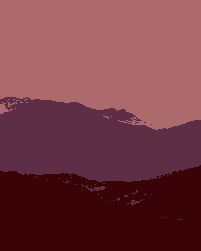

In [41]:
from image_multi_thresholding.utils import get_thresholded_image
get_thresholded_image(image, th_hst, COLORS)